## Lyapunov exponents of products random matrices

This is motivated by the theory of chaotic dynamical systems, specifically the observation that nearby trajectories in such systems typically separate exponentially, leading to unpredictability of systems with uncertain initial conditions (such as the weather). This is based on Jacques Venneste's work _"Estimating generalised Lyapunov exponents for products of random matrices"._

A simple model for this discretises time as $t=0,1,\cdots$ and treats the separation between nearby trajectories as a vector $\mathbf{x}_t \in \mathbb{R}^n$  which evolves according to
$$ \mathbf{x}_{t} = \mathbf{A}_t \mathbf{x}_{t-1}, \quad t=1,2,\cdots, \qquad \qquad (**)$$
where the $\mathbf{A}_t$ are independent random matrices. In this question we take these matrices to have independent normally distributed entries with zero mean and standard deviation $\sigma>0$.

The code below illustrates the remarkable property that $\|\mathbf{x}_t\|_p$ (for any $p$ - we will be using $p=2$ and omit it from the notation) grows exponentially in the following sense: define
$$
h_t = t^{-1} \log \| \mathbf{x}_t \|,
$$
then
$$
\lambda_1 = \lim_{t \to \infty} h_t.
$$
is well defined and independent of the random draw of the matrices $\mathbf{A}_t$ and of $\mathbf{x}_0$ (except for a $(n-1)$-dimensional subspace). (Test this by running the code multiple times.) The number $\lambda_1$ is termed (largest) Lyapunov exponent and is a key quantity in the study of chaotic dynamical systems.

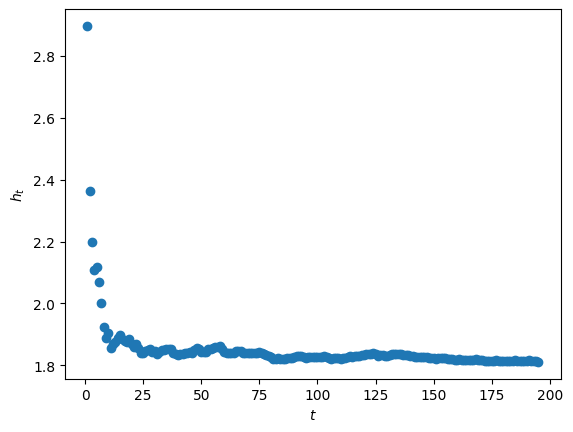

In [4]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt
from scipy.special import digamma

n = 10 # dimension of x_t
sigma = 2 # standard deviation of entries of random matrices

t_end = 200 # maximum of t

t = [k for k in range(1,t_end+1)] # list if values of t
x = np.ones(n) # initialise  x_0
h = np.zeros(len(t)) # list of h_t = t^{-1} log ||x_t||
for k in range(t_end):
    A = random.normal(0,sigma,(n,n)) # draw random matrix
    x = A @ x
    h[k] = np.log(np.linalg.norm(x,2))/t[k]
    #print(np.linalg.norm(x,2),t[k])


plt.plot(t,h,'o')
plt.xlabel('$t$')
plt.ylabel('$h_t$')
plt.show()

The code above crashes for large $n$ because of overflow: $\| \mathbf{x}_t \|$ becomes too large for the floating point representation. This makes it unusable to estimate $\lambda_1$ accurately. To address this, consider the unit vectors $\mathbf{y}_t = \mathbf{x}_t / \| \mathbf{x}_t \|$.

We show that that they satisfy $\mathbf{y}_t = \mathbf{A}_t \mathbf{y}_{t-1} /  \| \mathbf{A}_t \mathbf{y}_{t-1} \|$.

Proof: $\mathbf{y}_t = \frac{\mathbf{x}_t}{\| \mathbf{x}_{t} \|} = \frac{\mathbf{A}_t \mathbf{x}_{t-1}}{\|\mathbf{A}_t \mathbf{x}_{t-1} \|} = \frac{\mathbf{A}_t \mathbf{x}_{t-1}/ \|\mathbf{x}_{t-1}\|}{\|\mathbf{A}_t \mathbf{x}_{t-1} \|\ / \|\mathbf{x}_{t-1}\|} =  \frac{\mathbf{A}_t \mathbf{y}_{t-1}}{\|\mathbf{A}_t \mathbf{y}_{t-1}\|} =
\frac{\frac{\mathbf{A}_t \mathbf{x}_{t-1}} {\|\mathbf{x}_{t-1}\|}}{\|\frac{\mathbf{A}_t \mathbf{x}_{t-1}}{\|\mathbf{x}_{t-1}\| }\|} =  \frac{\mathbf{A}_t \mathbf{y}_{t-1}}{\|\mathbf{A}_t \mathbf{y}_{t-1}\|}$

We show that $h_t = t^{-1} \sum_{k=1}^t \ln r_k$, where $r_t =  \| \mathbf{A}_t \mathbf{y}_{t-1} \|$, assuming that $\| \mathbf{x}_0 \| = 1$.

**Proof:** $h_t = \frac{1}{t} log \| x_t \|$

$= \frac{1}{t} log \|A_t x_{t-1} \frac{\|x_{t-1}\|}{\|x_{t-1}\|}\|$

$= \frac{1}{t} log \|A_t y_{t-1} \|x_{t-1}\|\|$

$= \frac{1}{t} log \|A_t y_{t-1} \|A_{t-1} x_{t-2}\|\|$

$= \frac{1}{t} log \|A_t y_{t-1} \|A_{t-1} x_{t-2} \frac{\|x_{t-2}\|}{\|x_{t-2}\|}\|\|$
$= \frac{1}{t} log \|A_t y_{t-1} \|A_{t-1} y_{t-2}\| \|x_{t-2}\|\|\|$

Using the fact that  $\| \textbf{a} \|\textbf{b}\| \| = \| \textbf{a} \| \|\textbf{b}\|$,

$= (\frac{1}{t} log \|A_t y_{t-1} \|x_{t-2}\|\|\|) (\|A_{t-1} y_{t-2}\|)$

We apply this logic recursively

$= ... =$

$= \frac{1}{t} log \Pi_{i=1}^{t} \|A_t y_{t-1}\| $

$= \frac{1}{t} \Sigma_{i=1}^{t} log \|A_t y_{t-1}\|,$

where $y_0 = x_0$ since $\| x_0 \| = 1$

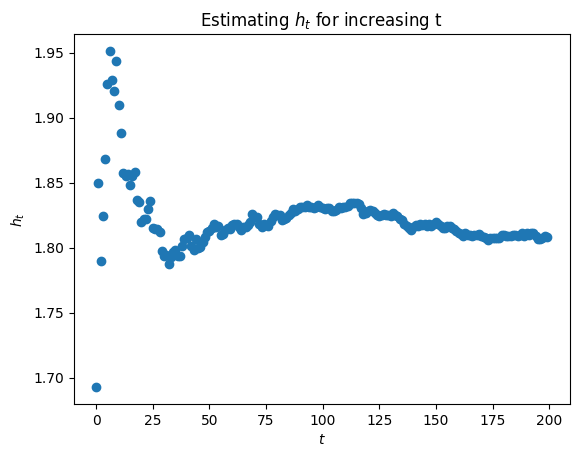

In [5]:
def LYA1(n, sigma, t):
  '''
  Estimates lambda_1 for a given n, sigma, t.
  '''
  t = [k for k in range(1,t+1)] # Creates a list of times 1 to t
  x = np.ones(n) # Creates a vector of 1s of size n
  y = x/np.linalg.norm(x,2) # Computes y as normalized x
  h = np.zeros(len(t)) # Creates a vector of size t
  A_ys_norm = []
  for i in t:
    A = random.normal(0,sigma,(n,n)) # Creates random normal matrix A_t with standard deviation sigma and dimensions nxn
    x = A @ x # Computes x_t+1 = A_tx_t-1
    A_y = A @ y # Computes A_ty_t-1
    A_ys_norm.append(np.linalg.norm(A_y,2)) # Stores the L2-norm of A_ty_t-1
    y = (A_y)/np.linalg.norm(A_y, 2) # Computes y_t as normalized (A_ty_t-1)
    h[i-1] = np.sum(np.log(A_ys_norm))/t[i-1] # Computes h_t = 1/t * sum(ln(r_k)) as defined in 4(a)(ii)
  return h

h = LYA1(10, 2, 200)
plt.plot(np.arange(200),h,'o')
plt.xlabel('$t$')
plt.ylabel('$h_t$')
plt.title('Estimating $h_t$ for increasing t')
plt.show()

A more refined characterisation of the dynamics of $\mathbf{x}_t$ is provided by the full set of Lyapunov exponents $\lambda_1 \ge \lambda_2 \ge \cdots \ge \lambda_n$. These are defined by
$$
\lambda_1 + \cdots + \lambda_k = \lim_{t \to \infty} t^{-1} \ln  V(\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t).
$$
Here $V(\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t)$ is the volume of the $k$-dimensional parallelepiped spanned by vectors $\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t$ each evolving according to (**) starting from linearly independent $\mathbf{x}^{(1)}_0,\cdots,\mathbf{x}^{(k)}_0$. This volume can be defined as
$$
V(\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t) = | \det (\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t,\mathbf{u}^{(1)},\cdots,\mathbf{u}^{(n-k)})|,
$$
where $(\mathbf{u}^{(1)},\cdots,\mathbf{u}^{(n-k)})$ are $n-k$ orthonormal vectors also orthogonal to $\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t$. (To see why this makes sense, think of the case $n=3$: for $k=1$ the volume is the length of $\mathbf{x}^{(1)}_t$, for $k=2$ it is the area of the parallelogram spanned by $(\mathbf{x}^{(1)}_t,\mathbf{x}^{(2)}_t)$, and for $k=3$ it is the volume of the parallelepiped spanned by  $(\mathbf{x}^{(1)}_t,\mathbf{x}^{(2)}_t,\mathbf{x}^{(3)}_t)$.)

We show that
$$
\lambda_k = \lim_{t \to \infty} t^{-1} \ln |r_{kk}|, \qquad \qquad (***)
$$
where $r_{kk}$ is the $k$th diagonal entry of $\mathbf{R}$, the upper triangular matrix in the QR factorisation of the matrix product $\mathbf{A}_t \cdots \mathbf{A}_1 = \mathbf{Q} \mathbf{R}$. (Hint: consider the QR factorisation of $[\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t,\mathbf{u}^{(1)},\cdots,\mathbf{u}^{(n-k)}]$.)

**Proof:** We assume $X_0 = [\mathbf{x}_0^{(1)},\cdots,\mathbf{x}_0^{(n)}] = I$

Hence, $A_{t}...A_{1}X_0 = A_{t}...A_{1}$

We know,

$$
V(\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t) = | \det (\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t,\mathbf{u}^{(1)},\cdots,\mathbf{u}^{(n-k)})| = |det([\mathbf{X} \ \mathbf{U}])|,
$$

We perform a QR decomposition on each of the elements in the block matrix. Note that $\mathbf{R_2} = \mathbf{I}$ since $\mathbf{U}$ is already orthogonal.

$$
[\mathbf{X} \ \mathbf{U}] = [\mathbf{Q_1}\mathbf{R_1} \ \mathbf{Q_2}\mathbf{R_2}] = [\mathbf{Q_1}\mathbf{R_1} \ \mathbf{Q_2}] = [\mathbf{Q_1} \ \mathbf{Q_2}]\ \begin{bmatrix}
R & 0 \\
0 & I_{n-k}
\end{bmatrix}
$$

Then,

$$
| det([\mathbf{Q_1} \ \mathbf{Q_2}]\ \begin{bmatrix}
R_1 & 0 \\
0 & I_{n-k}
\end{bmatrix})| = |det([\mathbf{Q_1} \ \mathbf{Q_2}])det(\begin{bmatrix}
R & 0 \\
0 & I_{n-k}
\end{bmatrix})| = |(\pm 1)det(R)det(I)| = |det(R)| = |\Pi^k_{i=1} R_{kk}| = \Pi^k_{i=1} |R_{kk}|
$$

We use the fact that the determinant of Orthogonal matrices are $\pm 1$, and the determinant of Triangular matrices are the product of the diagonal elements.

Therefore, $V(\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t) = \Pi^k_{i=1} |R_{ii}|$

We know that,

$$
\lambda_1 + \cdots + \lambda_k = \lim_{t \to \infty} t^{-1} \ln  V(\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t).
$$

So,

$
\lambda_k = (\lambda_1 + ... + \lambda_k) - (\lambda_1 + ... + \lambda_{k-1})
$

$
= \lim_{t \to \infty} t^{-1} \ln  V(\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t) - \lim_{t \to \infty} t^{-1} \ln  V(\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k-1)}_t)
$

$
= \lim_{t \to \infty} t^{-1} \ln  \frac{V(\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)})}{V(\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k-1)})}
$

$
= \lim_{t \to \infty} t^{-1} \ln \frac{\Pi^k_{i=1} |R_{ii}|}{\Pi^{k-1}_{i=1} |R_{ii}|}
$

$
= \lim_{t \to \infty} t^{-1}|R_{kk}|
$

We write an algorithm for the estimation of $\lambda_k, \, k=1,\cdots, n$, based on (***). For stability, the algorithm should not evaluate $\mathbf{A}_t \cdots \mathbf{A}_1$.

$$
A_{t}...A_{1} = A_{t}...A_{2}Q_{1}R_{1} = A_{t}...(A_{2}Q_{1})R_{1} = A_{t}...A_{3}Q_{2}R_{2}R_{1} = A_{t}...A_{4}(A_{3}Q_{2})R_{2}R_{1} = A_{t}...A_{4}Q_{3}R_{3}R_{2}R_{1} = ... = Q_{t}R_{t}...R_{1}
$$

where $A_{1} = Q_{1}R_{1}$ and $Q_{n}R_{n} = QR\_DECOMP(A_{n}Q_{n-1})$

Thus, we can estimate $\lambda_{k} = \Sigma_{i=1}^{t}log(|R^{i}_{k,k}|)$

##**Pseudocode for Algorithm**

**Inputs:**
$ (A_1,...,A_t), k, t $

**Outputs:**
$ \lambda_k $

**Pseudocode:**

Set $Q^0 = I, \lambda_k = 0$

> i) For $i$ in $1,...,t$:

>> $Q^i, R^i = QR\_DECOMP(A^{i}Q^{i-1})$

>> $\lambda_k = \lambda_k + log(|R^i_{kk}|)$

> iv) End loop

> $\lambda_k = \frac{1}{t} \lambda_k$

> Return $\lambda_k$

In [6]:
def estimate_lambda_k(As,k,t):
  '''
  Estimates lambda_k for a particular k.
  '''
  Rs = [] # Empty list to store all of the R matrices from QR
  lambda_k = 0 # Initialize lambda_k as 0
  Q = np.eye(A.shape[0]) # Define Q0 = I.
  for A in As: # Looping over all random matrices A
    Q, R = np.linalg.qr(A@Q) # Compute QR of A_tQ_{t-1}
    lambda_k += np.log(np.abs(R[k][k])) # Update lambda_k as given in (i) of our Algorithm
  return 1/t * lambda_k

In [7]:
def LYAall(n, sigma, t):
  '''
  Estimates lambda_k for all k, given a fixed n (dimension), sigma (sd of random matrix), t (number of timesteps).
  '''
  As = []
  for i in range(t):
    A = random.normal(0,sigma,(n,n)) # Generates t random normal matrices of size nxn each.
    As.append(A)
  Q, R = np.linalg.qr(As[0]) # Computes QR(A1)
  lambda_k = np.zeros(n) # Initializes lambda_k=0 for all k.
  for A in As[1:]: # Loops over A_2...A_t
    Q, R = np.linalg.qr(A@Q) # Compute QR of A_tQ_{t-1}
    lambda_k += np.log(np.abs(np.diag(R))) # Updates lambda_k for all k as indicated in (i) of our algorithm
  return 1/t * lambda_k # Returns estimated lambda_k

n, sigma, t = 10, 2, 10000 # Dimension, Standard Deviation, Number of timesteps
estimated_lambdas = LYAall(n, sigma, t)

For the matrices with normal entries there is a lovely closed-form formula:
$$
\lambda_k = \log \sigma + \tfrac{1}{2} \left( \log 2 + \Psi( (n-k+1)/2) \right),
$$
where $\Psi$ is the digamma function (available as `scipy.special.digamma` in Python). Write a code that produces a table showing the numerical estimates of $\lambda_k$, the exact values  and the relative errors (in percent) for fixed $n$, $\sigma$ and $t$. Our table shows for $n=10, \, \sigma = 2, \, t = 10000$.

In [8]:
def calculate_lambda(n, k, sigma):
    '''
    True Analytical Solution for lambda_k
    '''
    return np.log(sigma) + 0.5 * (np.log(2) + digamma((n - k + 1) / 2))

true_lambdas = []
ks = np.arange(1,11) # Generates a vector from 1 to 10 representing indices of lambda
for k in ks: # Loops over all k
  lambda_k = calculate_lambda(n, k, sigma) # Calls function to capture true lambda_k
  true_lambdas.append(lambda_k) # Stores lambda_k in list
true_lambdas = np.array(true_lambdas)

**Table of Estimates and their associated Relative Errors**

In [9]:
import pandas as pd

results = pd.DataFrame({'True': true_lambdas, 'Estimated': estimated_lambdas}) # Creates dataframe with True and Estimate columns
# Creates new column for Relative Errors
results['Relative Errors'] = ((results['True']-results['Estimated']).apply(np.linalg.norm))/(results['True'].apply(np.linalg.norm))
results.index += 1
results = results.rename_axis('Lambdas',axis=0)
results

,True,Estimated,Relative Errors
Lambdas,,,
1,1.792780,1.792935,0.000087
2,1.734156,1.732014,0.001235
3,1.667780,1.668738,0.000574
4,1.591299,1.593335,0.001279
5,1.501113,1.497883,0.002152
6,1.391299,1.393814,0.001808
7,1.251113,1.250880,0.000186
8,1.057966,1.062929,0.004691
9,0.751113,0.759084,0.010612


### Interestingly, $\lambda_{10}$'s relative error appears to be significantly higher than the others!